# ::---  Gather historical data  --::

In [12]:
import yfinance as yf
import pandas as pd

# Define tickers and date range
tickers = ["TSLA", "SPY", "BND"]
start_date = "2015-01-01"
end_date = "2025-07-31"

# Download data for multiple tickers
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# Extract the 'Adj Close' column for each ticker
data_adj_close = data['Adj Close']

# Save the merged adjusted close prices
data_adj_close.to_csv("../data/merged_prices.csv")
print("merged_prices.csv saved! to /data Directory")


[*********************100%***********************]  3 of 3 completed

merged_prices.csv saved! to /data Directory


::---  Strategy Backtesting  --::

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class PortfolioBacktest:
    def __init__(self, file_path, optimized_weights, benchmark_weights, start_date, end_date):
        self.file_path = file_path
        self.optimized_weights = optimized_weights
        self.benchmark_weights = benchmark_weights
        self.start_date = start_date
        self.end_date = end_date
        self.prices = None
        self.returns = None
        self.optimized_portfolio_returns = None
        self.benchmark_returns = None
        self.cum_opt = None
        self.cum_bench = None

    def load_data(self):
        """Load historical price data."""
        try:
            self.prices = pd.read_csv(self.file_path, index_col=0, parse_dates=True)
            self.prices = self.prices.loc[self.start_date:self.end_date]  # Filter the backtest period
            self.prices = self.prices.dropna()  # Drop missing data
        except FileNotFoundError as e:
            print(f"Error: The file could not be found. Please check the file path. Details: {e}")
            raise
        except Exception as e:
            print(f"An unexpected error occurred while loading data: {e}")
            raise

    def calculate_returns(self):
        """Calculate daily returns."""
        try:
            self.returns = self.prices.pct_change().dropna()
        except Exception as e:
            print(f"Error calculating returns: {e}")
            raise

    def simulate_portfolio_returns(self):
        """Simulate portfolio returns based on the defined weights."""
        try:
            self.optimized_portfolio_returns = (self.returns * self.optimized_weights).sum(axis=1)
            self.benchmark_returns = (self.returns * self.benchmark_weights).sum(axis=1)
        except Exception as e:
            print(f"Error simulating portfolio returns: {e}")
            raise

    def calculate_cumulative_returns(self):
        """Calculate cumulative returns for the portfolios."""
        try:
            self.cum_opt = (1 + self.optimized_portfolio_returns).cumprod()
            self.cum_bench = (1 + self.benchmark_returns).cumprod()
        except Exception as e:
            print(f"Error calculating cumulative returns: {e}")
            raise

    def sharpe_ratio(self, r, risk_free_rate=0.02):
        """Calculate the Sharpe ratio for a given return series."""
        try:
            excess_ret = r - risk_free_rate / 252  # Adjust for daily returns
            return np.sqrt(252) * excess_ret.mean() / excess_ret.std()
        except Exception as e:
            print(f"Error calculating Sharpe ratio: {e}")
            raise

    def total_return(self, r):
        """Calculate the total return of a given return series."""
        try:
            return (1 + r).prod() - 1
        except Exception as e:
            print(f"Error calculating total return: {e}")
            raise

    def print_performance(self):
        """Print the performance metrics for both portfolios."""
        try:
            print("Optimized Portfolio:")
            print(f"  Total Return: {self.total_return(self.optimized_portfolio_returns)*100:.2f}%")
            print(f"  Sharpe Ratio: {self.sharpe_ratio(self.optimized_portfolio_returns):.2f}")

            print("Benchmark Portfolio (60% SPY, 40% BND):")
            print(f"  Total Return: {self.total_return(self.benchmark_returns)*100:.2f}%")
            print(f"  Sharpe Ratio: {self.sharpe_ratio(self.benchmark_returns):.2f}")
        except Exception as e:
            print(f"Error printing performance: {e}")
            raise

    def plot_performance(self):
        """Plot the performance of the portfolios."""
        try:
            plt.figure(figsize=(10, 6))
            plt.plot(self.cum_opt, label="Optimized Portfolio")
            plt.plot(self.cum_bench, label="Benchmark (60% SPY, 40% BND)")
            plt.title("Portfolio Backtest Results")
            plt.xlabel("Date")
            plt.ylabel("Cumulative Return")
            plt.legend()
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(f"Error plotting performance: {e}")
            raise


# ---------------------------
# Main execution
# ---------------------------

In [14]:
def main():
    # Define file path and weights
    file_path = "../data/merged_prices.csv"
    optimized_weights = np.array([0.50, 0.30, 0.20])  # TSLA, SPY, BND
    benchmark_weights = np.array([0.60, 0.40, 0.00])  # 60% SPY, 40% BND

    # Define the backtesting period
    start_date = "2020-08-01"
    end_date = "2025-07-31"

    # Create a PortfolioBacktest instance
    backtest = PortfolioBacktest(file_path, optimized_weights, benchmark_weights, start_date, end_date)

    # Perform steps
    try:
        backtest.load_data()
        backtest.calculate_returns()
        backtest.simulate_portfolio_returns()
        backtest.calculate_cumulative_returns()
        backtest.print_performance()
        backtest.plot_performance()
    except Exception as e:
        print(f"An error occurred during the backtest: {e}")


# Run the main function

Optimized Portfolio:
  Total Return: 78.85%
  Sharpe Ratio: 0.66
Benchmark Portfolio (60% SPY, 40% BND):
  Total Return: 31.80%
  Sharpe Ratio: 0.46


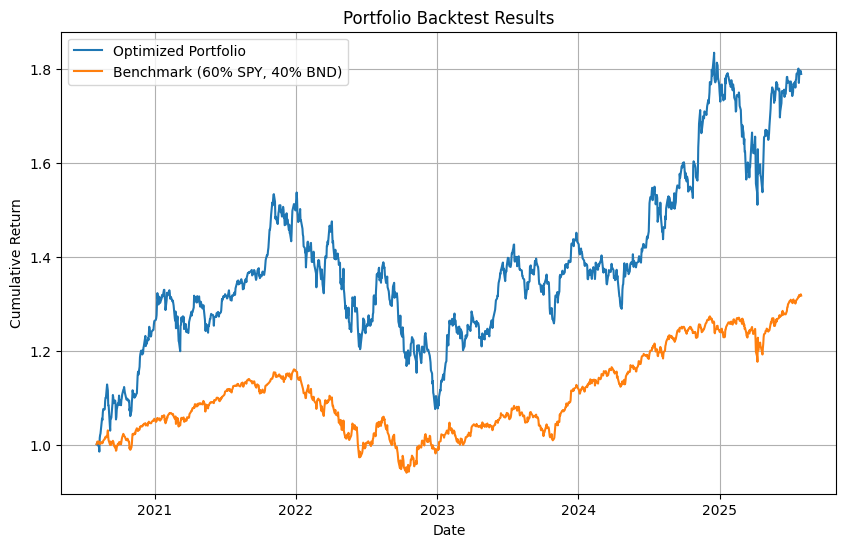

In [15]:
if __name__ == "__main__":
    main()